# Form factors of LFVHD in the 2HDM-III

In this notebook we analyze the LFVHD in the 2HDM-III. In this model the couplings of the neutral higgs bosons $h$, $H$ and $A$ are given by
$$
g_{hff'} = \frac{1}{v}s_{\beta- \alpha} \hat{M_f} + \frac{1}{\sqrt{2}}\rho_f c_{\beta- \alpha}
$$
$$
g_{Hff'} = \frac{1}{v}c_{\beta- \alpha} \hat{M_f} - \frac{1}{\sqrt{2}}\rho_f s_{\beta- \alpha}
$$
$$
g_{Aff'} = \frac{i}{\sqrt{2}}\rho_f s_{f}
$$

where $f = u,d,e$, $s_f = 1$ for down-type quarks and charged leptons and $s_f= -1$ for up-type quarks.

Also, the neutral scalar couplings to a pair of gauge bosons are fully by the gauge symmetry. One has

$$C_{hWW} = s_{\beta- \alpha} C_{hWW}^{SM}$$
$$C_{HWW} = c_{\beta- \alpha} C_{hWW}^{SM}$$
$$C_{hWW} = 0$$.

In [1]:
from sympy import symbols, init_printing, conjugate,I,IndexedBase,sqrt,collect,simplify
from sympy import lambdify
init_printing()

In [2]:
import OneLoopLFVHD as lfvhd

In [3]:
ma,mi,mj = lfvhd.ma,lfvhd.mi,lfvhd.mj
ma,mi,mj

In [4]:
from mpmath import mp

In [5]:
mp.dps = 80; mp.pretty = True

## python definitions of couplings

In [6]:
g,v = symbols(r'g,v',real=True)
Yh = IndexedBase(r'Yh')
mW,mel,mem,mh = symbols(r'm_W, m_{e_l},m_{e_m},m_h',real=True)


l,m,i,j = symbols('l,m,i,j',integer=True)

In [7]:
# hGdGu = lfvhd.VertexHSS(-I*λ1*v)
# Guljνl = lfvhd.VertexSFF(I*(sqrt(2)/v)*mj*U[l,j],0)
# Gdliνl = lfvhd.VertexSFF(0,I*(sqrt(2)/v)*mi*conjugate(U[l,i]))

# hGdWu = lfvhd.VertexHSpVm(-I*g/2)
# Wuljνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*U[l,j])
# hWdGu = lfvhd.VertexHVpSm(-I*g/2)
# Wdliνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*conjugate(U[l,i]))
# hWdWu = lfvhd.VertexHVV(I*g**2/2*v)
# hljlj = lfvhd.VertexHFF((I*g*mj)/(2*sqrt(2)*mW))
# hlili = lfvhd.VertexHFF((I*g*mi)/(2*sqrt(2)*mW))

In [8]:
hee = lambda l,m: lfvhd.VertexSFF(Yh[l,m],Yh[l,m])

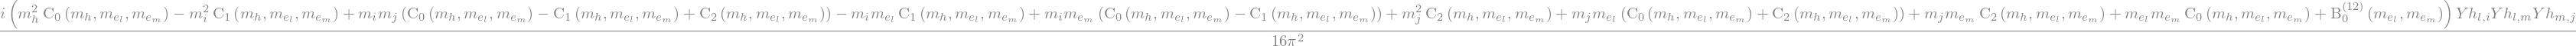

In [9]:
Triangle_helem = lfvhd.TriangleSFF(hee(l,m),hee(m,j),hee(l,i),[mh,mel,mem])
Triangle_helem.AL().simplify()

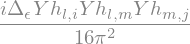

In [10]:
((Triangle_helem.AL()).subs(lfvhd.cambiosDivFin(mh,mel,mem)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()

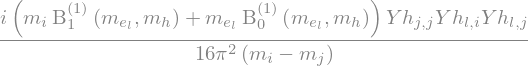

In [11]:
bubble_elh = lfvhd.BubbleFS(hee(j,j),hee(l,j),hee(l,i),[mel,mh])
AL_elh = bubble_elh.AL().simplify()
AL_elh

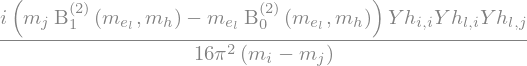

In [12]:
bubble_hel = lfvhd.BubbleSF(hee(i,i),hee(l,j),hee(l,i),[mel,mh])
AL_hel = bubble_hel.AL().simplify()
AL_hel

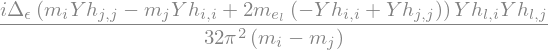

In [13]:
((AL_elh + AL_hel).subs(lfvhd.cambiosDivFin(mel,mh,mh)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()